In [ ]:
from google.colab import files
from PIL import Image

uploaded = files.upload()

Saving imdb_top_1000.csv to imdb_top_1000 (1).csv


In [ ]:
import pandas as pd 
df=pd.read_csv('imdb_top_1000.csv', encoding='utf8')
df['Gross']=df['Gross'].str.replace(',','') #remove column
df = df.dropna(subset=["Gross"]) #dropnNaN because was affecting conversion to int
df = df.dropna(subset=["Certificate"]) #dropnNaN because was affecting conversion to int
df = df.dropna(subset=["Meta_score"]) #dropnNaN because was affecting conversion to int
df['Gross'] = df['Gross'].astype(int) #convert to int
df.sort_values(["Released_Year"], 
                    axis=0,
                    ascending=[True], 
                    inplace=True)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
461,https://m.media-amazon.com/images/M/MV5BMzg2MW...,All Quiet on the Western Front,1930,U,152 min,"Drama, War",8.0,"A German youth eagerly enters World War I, but...",91.0,Lewis Milestone,Lew Ayres,Louis Wolheim,John Wray,Arnold Lucy,57318,3270000
52,https://m.media-amazon.com/images/M/MV5BY2I4Mm...,City Lights,1931,G,87 min,"Comedy, Drama, Romance",8.5,"With the aid of a wealthy erratic tippler, a d...",99.0,Charles Chaplin,Charles Chaplin,Virginia Cherrill,Florence Lee,Harry Myers,167839,19181
566,https://m.media-amazon.com/images/M/MV5BZTY3Yj...,King Kong,1933,Passed,100 min,"Adventure, Horror, Sci-Fi",7.9,A film crew goes to a tropical island for an e...,90.0,Merian C. Cooper,Ernest B. Schoedsack,Fay Wray,Robert Armstrong,Bruce Cabot,78991,10000000
316,https://m.media-amazon.com/images/M/MV5BYzJmMW...,It Happened One Night,1934,Approved,105 min,"Comedy, Romance",8.1,A renegade reporter and a crazy young heiress ...,87.0,Frank Capra,Clark Gable,Claudette Colbert,Walter Connolly,Roscoe Karns,94016,4360000
51,https://m.media-amazon.com/images/M/MV5BYjJiZj...,Modern Times,1936,G,87 min,"Comedy, Drama, Family",8.5,The Tramp struggles to live in modern industri...,96.0,Charles Chaplin,Charles Chaplin,Paulette Goddard,Henry Bergman,Tiny Sandford,217881,163245


In [ ]:
df.shape

(714, 16)

In [ ]:
#convert IMDB rating to hundred to match Meta score
def to_hundred(x):
  return x*10
df.IMDB_Rating = df.IMDB_Rating.apply(to_hundred)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,AVG_Meta_score
461,https://m.media-amazon.com/images/M/MV5BMzg2MW...,All Quiet on the Western Front,1930,U,152 min,"Drama, War",80.0,"A German youth eagerly enters World War I, but...",91.0,Lewis Milestone,Lew Ayres,Louis Wolheim,John Wray,Arnold Lucy,57318,3270000,86.000000
52,https://m.media-amazon.com/images/M/MV5BY2I4Mm...,City Lights,1931,G,87 min,"Comedy, Drama, Romance",85.0,"With the aid of a wealthy erratic tippler, a d...",99.0,Charles Chaplin,Charles Chaplin,Virginia Cherrill,Florence Lee,Harry Myers,167839,19181,76.789474
566,https://m.media-amazon.com/images/M/MV5BZTY3Yj...,King Kong,1933,Passed,100 min,"Adventure, Horror, Sci-Fi",79.0,A film crew goes to a tropical island for an e...,90.0,Merian C. Cooper,Ernest B. Schoedsack,Fay Wray,Robert Armstrong,Bruce Cabot,78991,10000000,90.000000
316,https://m.media-amazon.com/images/M/MV5BYzJmMW...,It Happened One Night,1934,Approved,105 min,"Comedy, Romance",81.0,A renegade reporter and a crazy young heiress ...,87.0,Frank Capra,Clark Gable,Claudette Colbert,Walter Connolly,Roscoe Karns,94016,4360000,82.666667
51,https://m.media-amazon.com/images/M/MV5BYjJiZj...,Modern Times,1936,G,87 min,"Comedy, Drama, Family",85.0,The Tramp struggles to live in modern industri...,96.0,Charles Chaplin,Charles Chaplin,Paulette Goddard,Henry Bergman,Tiny Sandford,217881,163245,71.666667


In [ ]:
#attempting to group dataset by year and calculate average gross per genre

df['AVG_Meta_score'] = df.groupby('Genre').Meta_score.transform('mean')
df['AVG_IMDB_Rating'] = df.groupby('Genre').IMDB_Rating.transform('mean')
df.head(8)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,AVG_Meta_score,AVG_IMDB_Rating
461,https://m.media-amazon.com/images/M/MV5BMzg2MW...,All Quiet on the Western Front,1930,U,152 min,"Drama, War",80.0,"A German youth eagerly enters World War I, but...",91.0,Lewis Milestone,Lew Ayres,Louis Wolheim,John Wray,Arnold Lucy,57318,3270000,86.000000,81.000000
52,https://m.media-amazon.com/images/M/MV5BY2I4Mm...,City Lights,1931,G,87 min,"Comedy, Drama, Romance",85.0,"With the aid of a wealthy erratic tippler, a d...",99.0,Charles Chaplin,Charles Chaplin,Virginia Cherrill,Florence Lee,Harry Myers,167839,19181,76.789474,78.526316
566,https://m.media-amazon.com/images/M/MV5BZTY3Yj...,King Kong,1933,Passed,100 min,"Adventure, Horror, Sci-Fi",79.0,A film crew goes to a tropical island for an e...,90.0,Merian C. Cooper,Ernest B. Schoedsack,Fay Wray,Robert Armstrong,Bruce Cabot,78991,10000000,90.000000,79.000000
316,https://m.media-amazon.com/images/M/MV5BYzJmMW...,It Happened One Night,1934,Approved,105 min,"Comedy, Romance",81.0,A renegade reporter and a crazy young heiress ...,87.0,Frank Capra,Clark Gable,Claudette Colbert,Walter Connolly,Roscoe Karns,94016,4360000,82.666667,81.333333
51,https://m.media-amazon.com/images/M/MV5BYjJiZj...,Modern Times,1936,G,87 min,"Comedy, Drama, Family",85.0,The Tramp struggles to live in modern industri...,96.0,Charles Chaplin,Charles Chaplin,Paulette Goddard,Henry Bergman,Tiny Sandford,217881,163245,71.666667,80.000000
564,https://m.media-amazon.com/images/M/MV5BYjZjOT...,The Adventures of Robin Hood,1938,PG,102 min,"Action, Adventure, Romance",79.0,When Prince John and the Norman Lords begin op...,97.0,Michael Curtiz,William Keighley,Errol Flynn,Olivia de Havilland,Basil Rathbone,47175,3981000,97.000000,79.000000
458,https://m.media-amazon.com/images/M/MV5BNjUyMT...,The Wizard of Oz,1939,U,102 min,"Adventure, Family, Fantasy",80.0,Dorothy Gale is swept away from a farm in Kans...,92.0,Victor Fleming,George Cukor,Mervyn LeRoy,Norman Taurog,Richard Thorpe,371379,2076020,75.285714,77.857143
313,https://m.media-amazon.com/images/M/MV5BZTYwYj...,Mr. Smith Goes to Washington,1939,Passed,129 min,"Comedy, Drama",81.0,A naive man is appointed to fill a vacancy in ...,73.0,Frank Capra,James Stewart,Jean Arthur,Claude Rains,Edward Arnold,107017,9600000,80.500000,78.500000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

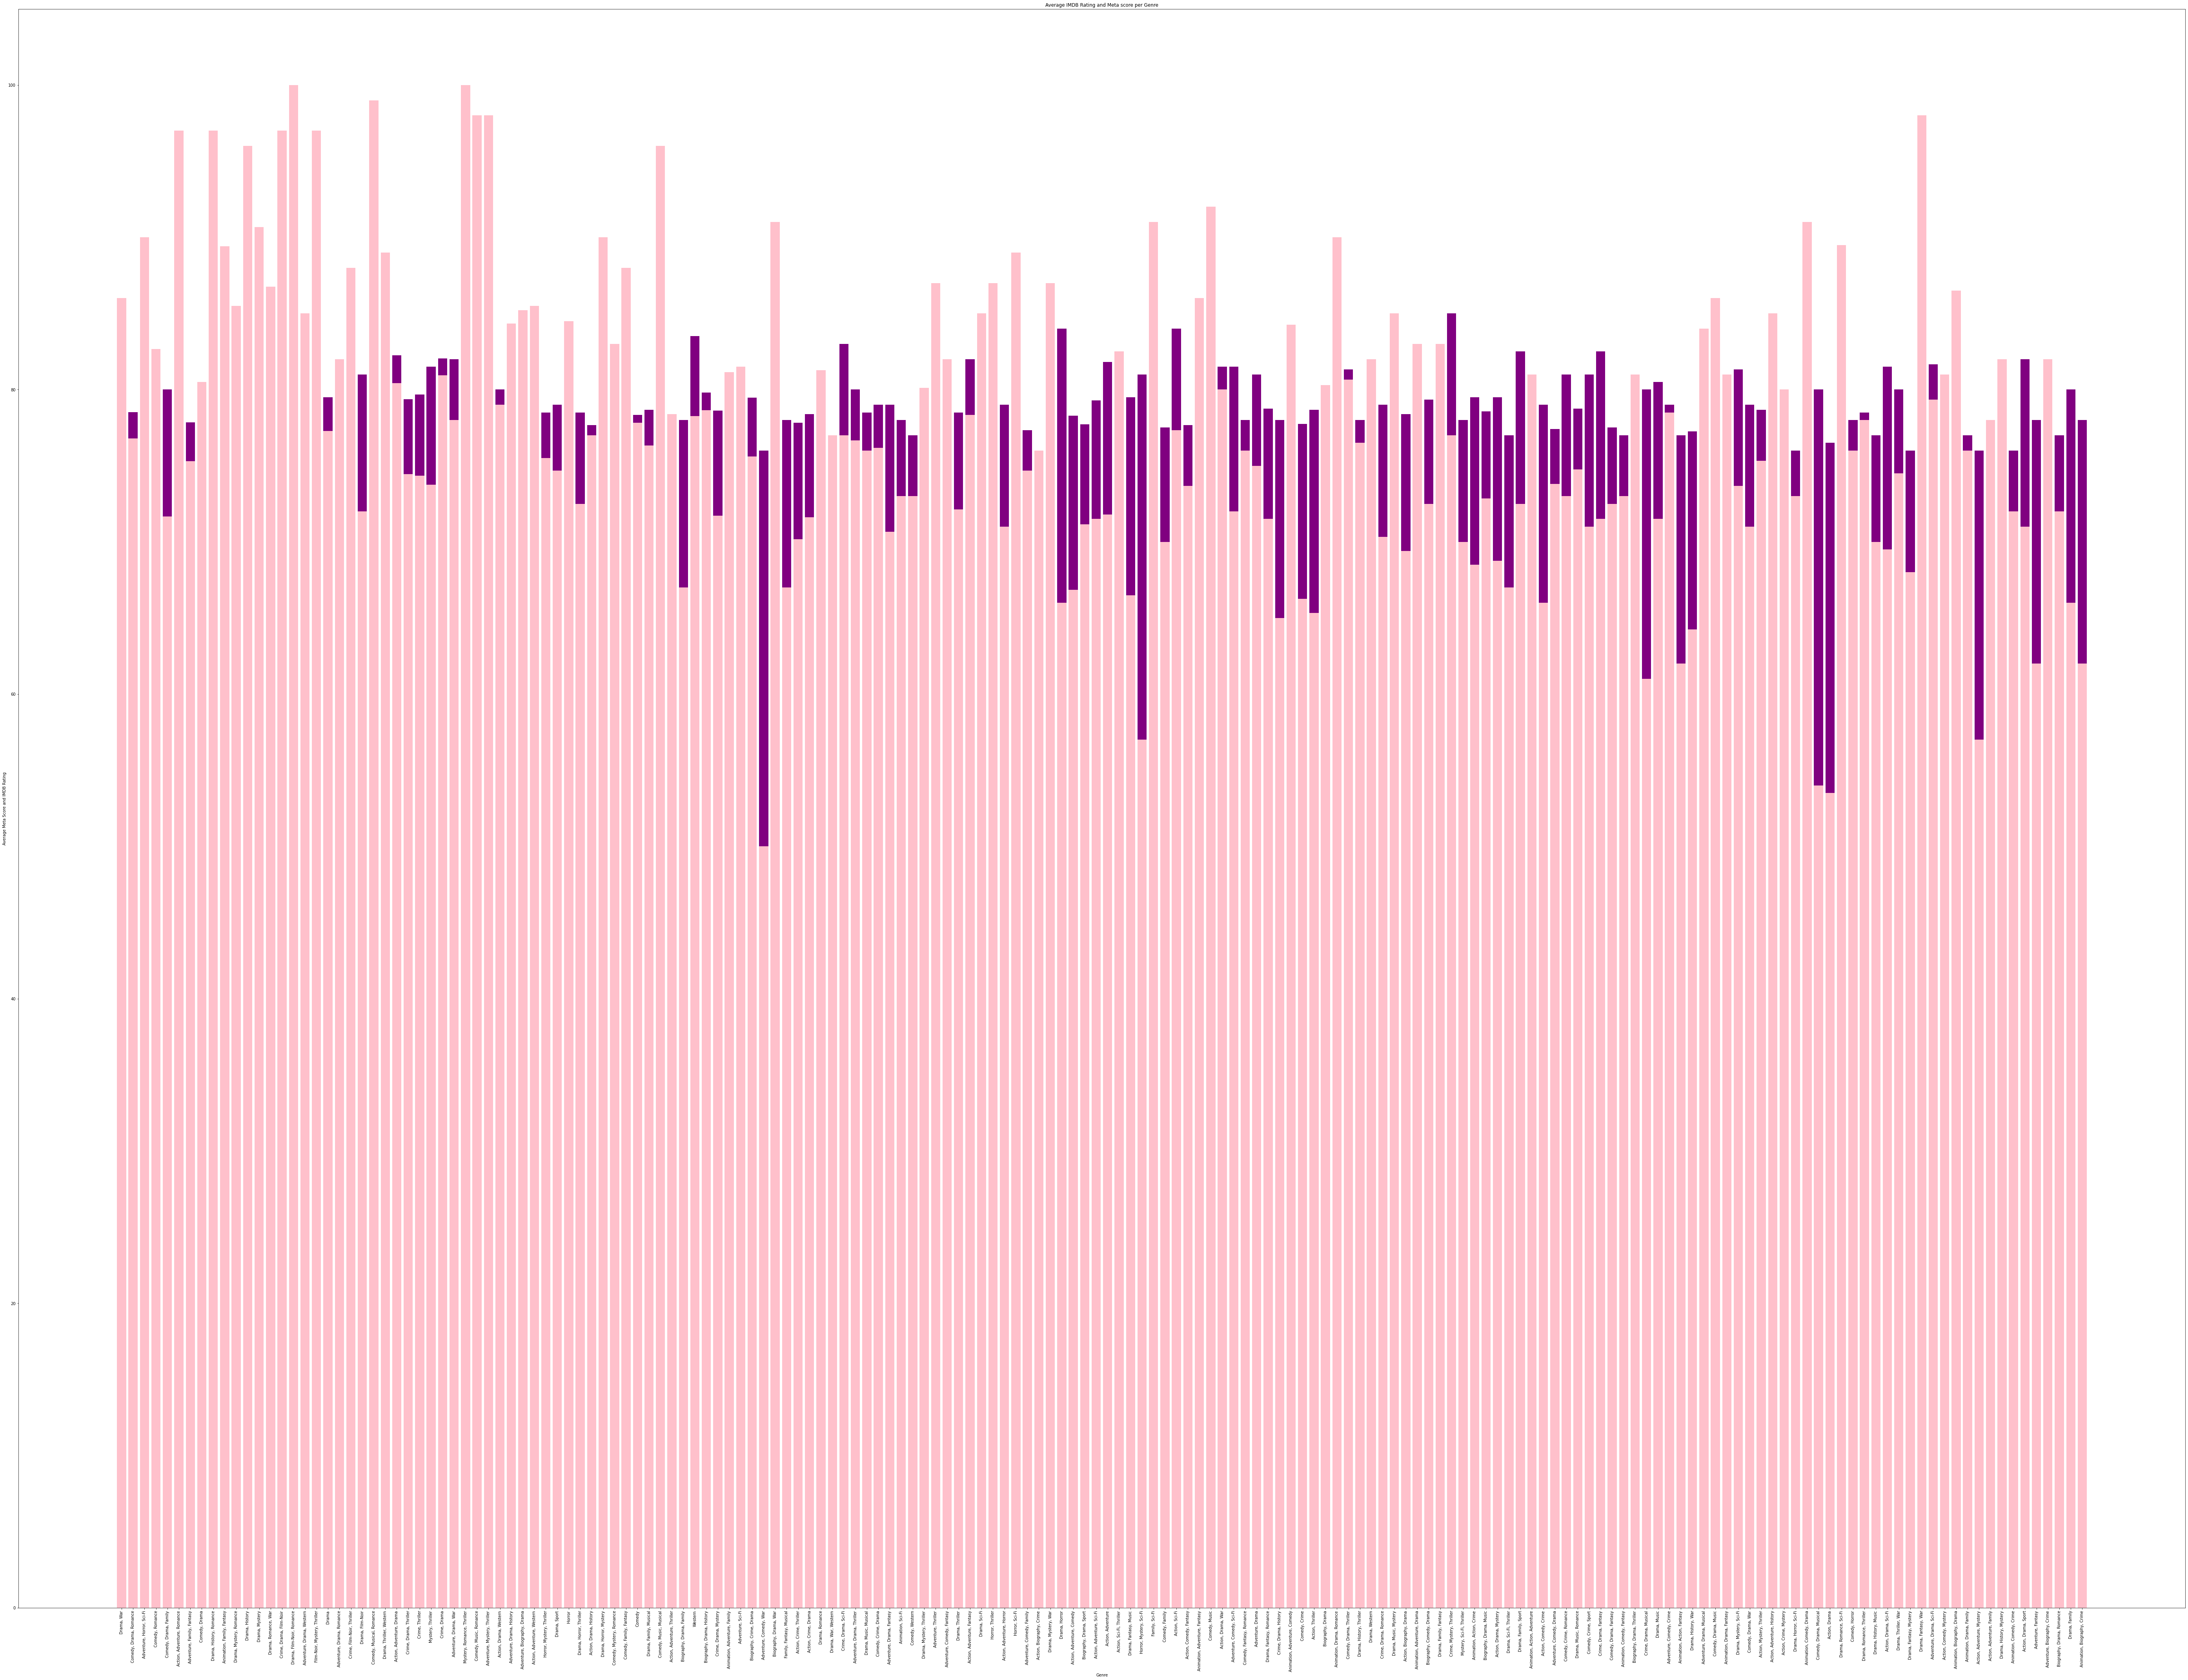

In [ ]:
fig, ax = plt.subplots(figsize=(99,75))
ax.bar(df["Genre"], df["AVG_IMDB_Rating"], color="purple")
ax.bar(df["Genre"], df["AVG_Meta_score"], color="pink")
plt.title("Average IMDB Rating and Meta score per Genre") 
plt.xlabel("Genre")
plt.ylabel("Average Meta Score and IMDB Rating")
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.show() 